<a href="https://colab.research.google.com/github/dawidmakowski-git/tensorflow_tutorials/blob/master/Custom_training_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.0
Eager execution: True


# The Iris classification problem

In [6]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [8]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [9]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [10]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

# Create a tf.data.Dataset

In [11]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [12]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([4.9, 6.1, 6.7, 5.8, 6.2, 5. , 4.8, 5.8, 6.5, 6.6, 5.7, 6.3, 5.1,
       5.7, 6.4, 7.4, 6.5, 4.8, 5. , 7.2, 5.8, 4.6, 5.5, 4.4, 7.6, 4.9,
       6.1, 5. , 5.7, 5.6, 5.8, 5.2], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.1, 2.6, 3.3, 4. , 2.2, 2.3, 3. , 2.7, 3. , 2.9, 2.8, 3.3, 3.8,
       2.9, 2.7, 2.8, 3. , 3.1, 2. , 3.6, 2.8, 3.1, 2.4, 3.2, 3. , 3.1,
       2.8, 3.5, 3. , 2.5, 2.7, 3.5], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 5.6, 5.7, 1.2, 4.5, 3.3, 1.4, 4.1, 5.2, 4.6, 4.5, 6. , 1.5,
       4.2, 5.3, 6.1, 5.5, 1.6, 3.5, 6.1, 5.1, 1.5, 3.8, 1.3, 6.6, 1.5,
       4. , 1.6, 4.2, 3.9, 5.1, 1.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.1, 1.4, 2.1, 0.2, 1.5, 1. , 0.1, 1. , 2. , 1.3, 1.3, 2.5, 0.3,
       1.3, 1.9, 1.9, 1.8, 0.2, 1. , 2.5, 2.4, 0.2, 1.1, 0.2,

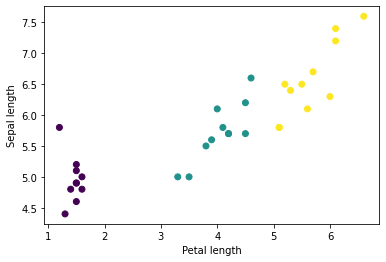

In [13]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [14]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [15]:
train_dataset = train_dataset.map(pack_features_vector)

In [16]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.3 2.5 5.  1.9]
 [6.1 2.9 4.7 1.4]
 [5.7 4.4 1.5 0.4]
 [4.4 3.  1.3 0.2]
 [6.4 3.1 5.5 1.8]], shape=(5, 4), dtype=float32)


In [17]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [18]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 3.3175755 , -2.6104174 ,  2.5804517 ],
       [ 2.837049  , -2.5169387 ,  2.481507  ],
       [ 1.1170979 , -2.0425978 ,  2.278026  ],
       [ 0.79917735, -1.5049311 ,  1.6946164 ],
       [ 3.4541507 , -2.9070106 ,  2.7084827 ]], dtype=float32)>

In [19]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.67515016, 0.00179848, 0.32305136],
       [0.5863305 , 0.00277291, 0.4108966 ],
       [0.23610885, 0.01002014, 0.75387096],
       [0.2818284 , 0.02813994, 0.69003165],
       [0.6774404 , 0.00117018, 0.32138944]], dtype=float32)>

In [20]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 2 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0]
    Labels: [2 1 0 0 2 0 2 1 2 0 1 2 1 1 2 2 2 1 2 2 2 1 1 0 2 1 1 0 0 0 1 1]


In [21]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [22]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 2.873091220855713


In [23]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [24]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [25]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 2.873091220855713
Step: 1,         Loss: 1.9915876388549805


In [26]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.545, Accuracy: 14.167%
Epoch 050: Loss: 0.375, Accuracy: 91.667%
Epoch 100: Loss: 0.190, Accuracy: 95.833%
Epoch 150: Loss: 0.135, Accuracy: 97.500%
Epoch 200: Loss: 0.110, Accuracy: 97.500%


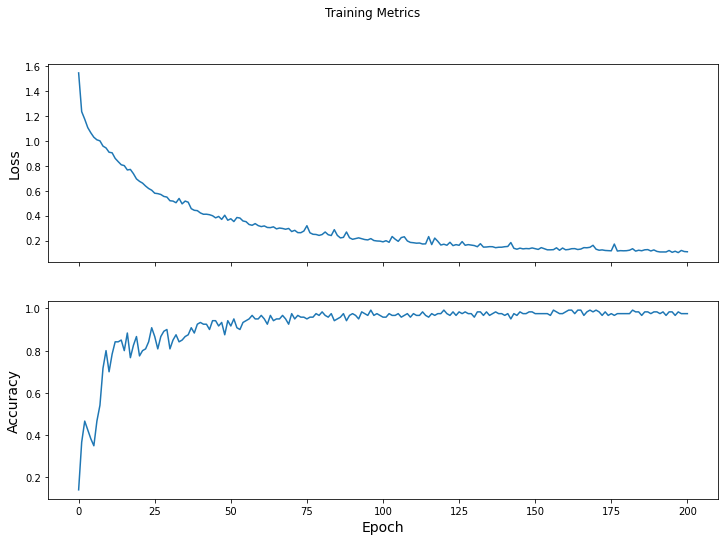

In [27]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()